In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import learning_curve
import xgboost as xgb
import lightgbm as lgb



In [41]:
df = pd.read_csv('laptopprices.csv')

In [42]:
df.head(10)

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($)
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,2673.07
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,751.17
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,2059.83
5,Acer,AMD Ryzen 3,64,2TB SSD,Nvidia RTX 3060,14.0,1366x768,7.1,1.85,Linux,1676.64
6,Dell,Intel i5,8,1TB SSD,Nvidia RTX 2060,15.6,2560x1440,9.1,1.98,Windows,1449.05
7,Microsoft,AMD Ryzen 9,8,1TB SSD,Nvidia RTX 3080,17.3,2560x1440,9.8,1.26,Linux,2193.55
8,Apple,Intel i5,64,256GB SSD,Nvidia RTX 2060,15.6,3840x2160,11.5,1.48,Linux,6409.03
9,HP,AMD Ryzen 5,4,1TB SSD,AMD Radeon RX 6800,14.0,3840x2160,7.5,2.19,FreeDOS,1556.72


In [43]:
df.dtypes

Brand                    object
Processor                object
RAM (GB)                  int64
Storage                  object
GPU                      object
Screen Size (inch)      float64
Resolution               object
Battery Life (hours)    float64
Weight (kg)             float64
Operating System         object
Price ($)               float64
dtype: object

In [44]:
df.isnull().sum()

Brand                   0
Processor               0
RAM (GB)                0
Storage                 0
GPU                     0
Screen Size (inch)      0
Resolution              0
Battery Life (hours)    0
Weight (kg)             0
Operating System        0
Price ($)               0
dtype: int64

In [45]:
df.columns

Index(['Brand', 'Processor', 'RAM (GB)', 'Storage', 'GPU',
       'Screen Size (inch)', 'Resolution', 'Battery Life (hours)',
       'Weight (kg)', 'Operating System', 'Price ($)'],
      dtype='object')

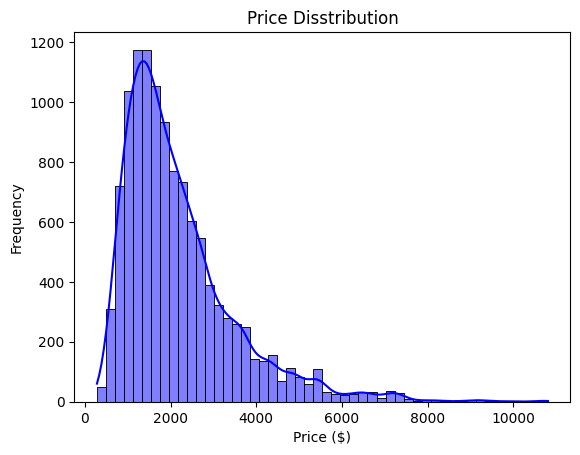

In [46]:
plt.Figure(figsize=(12,6))
sns.histplot(df['Price ($)'], bins=50, kde = True, color= 'blue')

plt.title('Price Disstribution')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

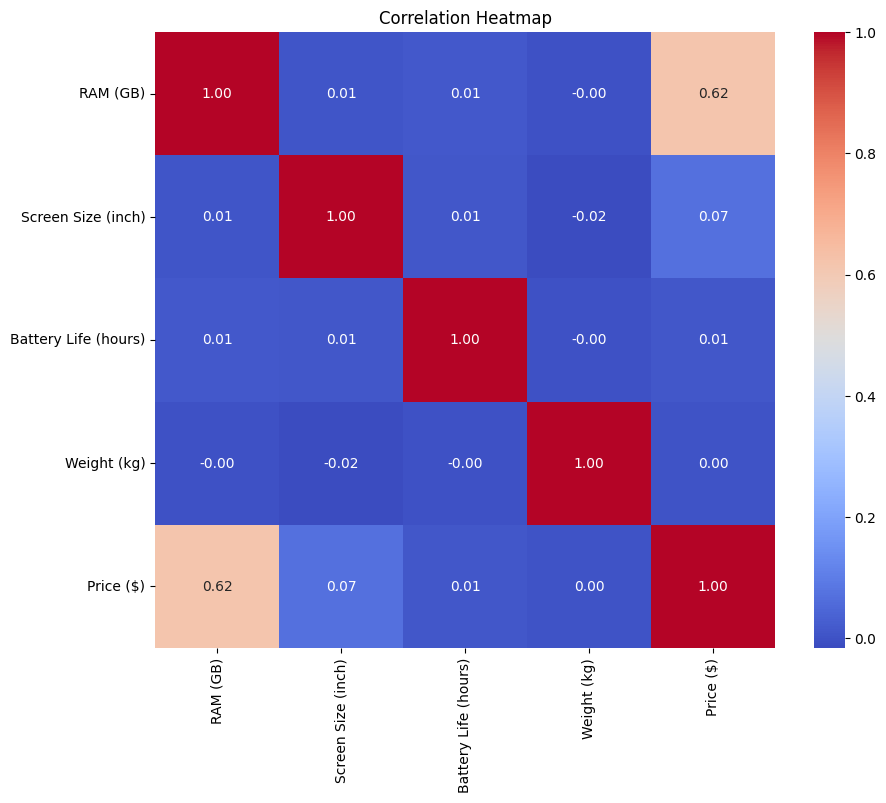

In [47]:
plt.figure(figsize=(10, 8))
numerical_features = ['RAM (GB)', 'Screen Size (inch)', 'Battery Life (hours)', 'Weight (kg)', 'Price ($)']
corr_matrix = df[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [48]:
numerical_features = ['RAM (GB)', 'Screen Size (inch)', 'Battery Life (hours)', 'Weight (kg)', 'Price ($)']
corr_matrix = df[numerical_features].corr()
print(corr_matrix)

                      RAM (GB)  Screen Size (inch)  Battery Life (hours)  \
RAM (GB)              1.000000            0.007915              0.012470   
Screen Size (inch)    0.007915            1.000000              0.008348   
Battery Life (hours)  0.012470            0.008348              1.000000   
Weight (kg)          -0.001716           -0.015508             -0.001774   
Price ($)             0.616221            0.069829              0.009778   

                      Weight (kg)  Price ($)  
RAM (GB)                -0.001716   0.616221  
Screen Size (inch)      -0.015508   0.069829  
Battery Life (hours)    -0.001774   0.009778  
Weight (kg)              1.000000   0.002431  
Price ($)                0.002431   1.000000  


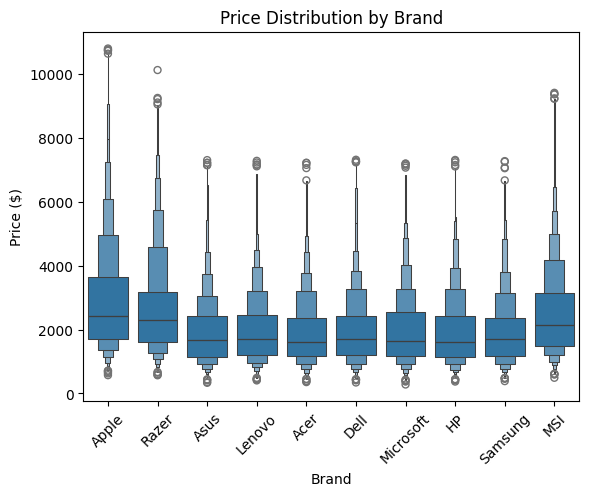

In [49]:
plt.Figure(figsize=(14,6))
sns.boxenplot(x='Brand', y='Price ($)', data=df)
plt.xticks(rotation=45)
plt.title('Price Distribution by Brand')
plt.show()

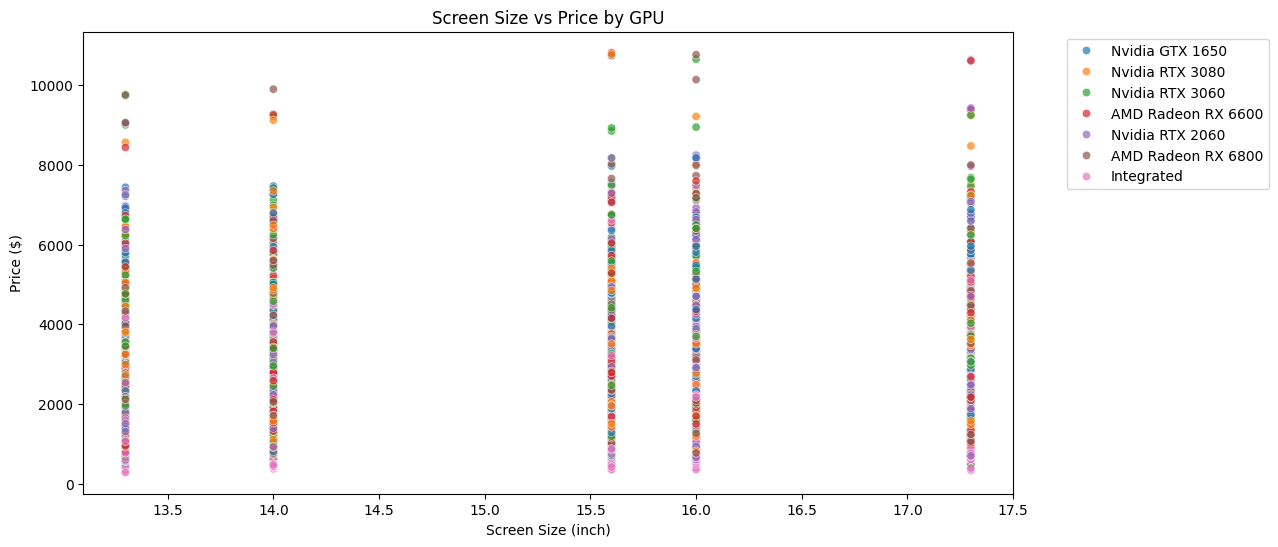

In [50]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Screen Size (inch)', y='Price ($)', hue='GPU', data=df, palette='tab10', alpha=0.7)
plt.title('Screen Size vs Price by GPU')
plt.xlabel('Screen Size (inch)')
plt.ylabel('Price ($)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

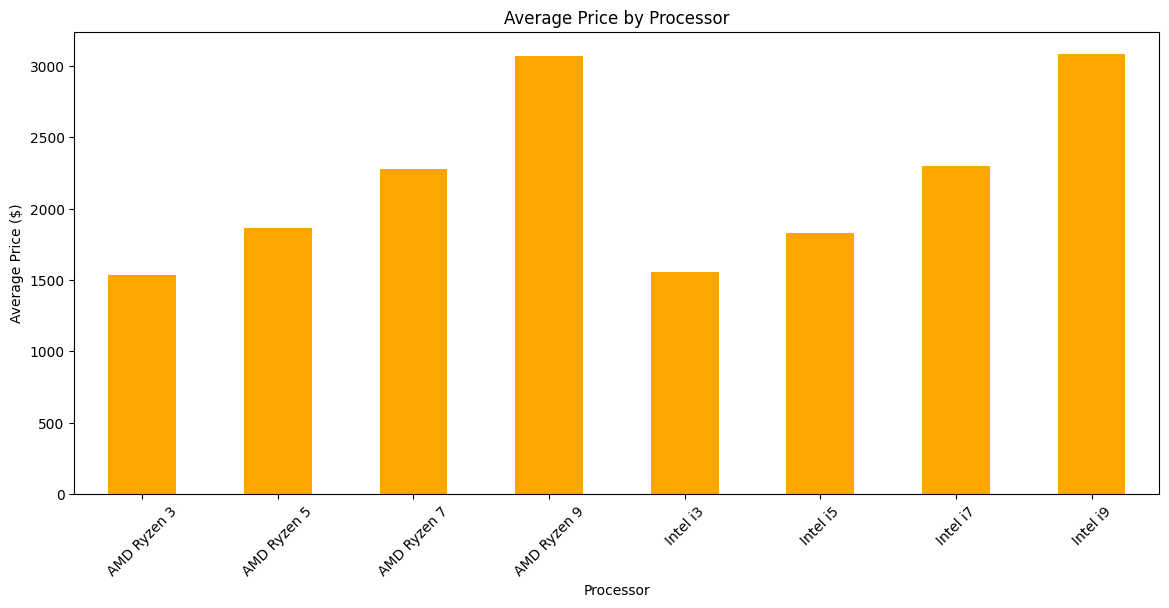

In [51]:
plt.figure(figsize=(14, 6))
df.groupby('Processor')['Price ($)'].mean().plot(kind='bar', color='orange')
plt.title('Average Price by Processor')
plt.xlabel('Processor')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.show()

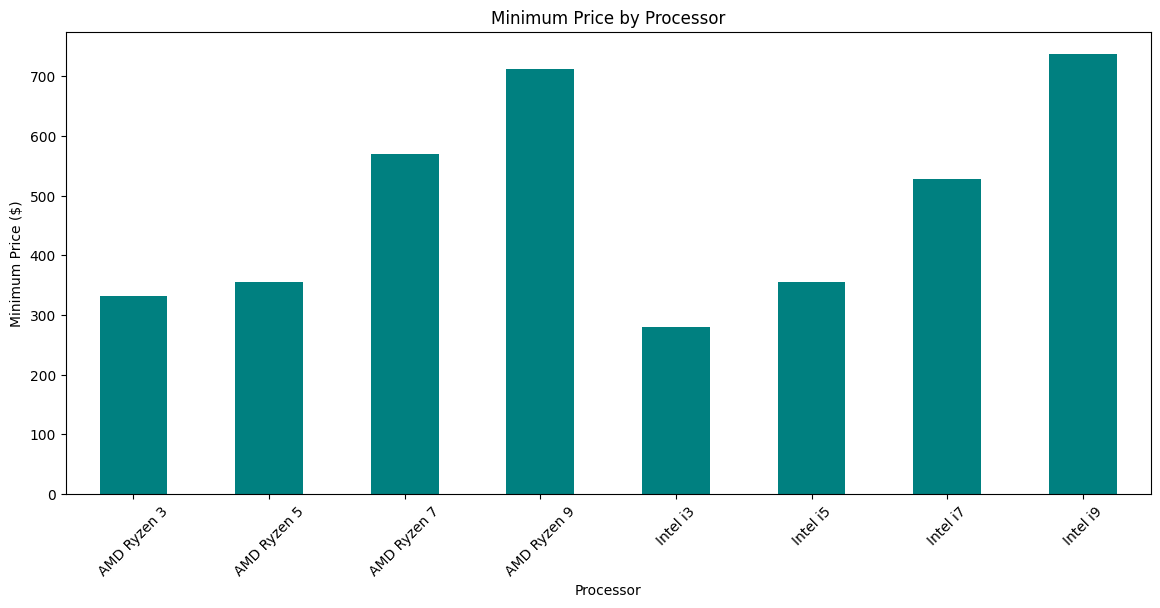

In [52]:
plt.figure(figsize=(14, 6))
df.groupby('Processor')['Price ($)'].min().plot(kind='bar', color='teal')
plt.title('Minimum Price by Processor')
plt.xlabel('Processor')
plt.ylabel('Minimum Price ($)')
plt.xticks(rotation=45)
plt.show()

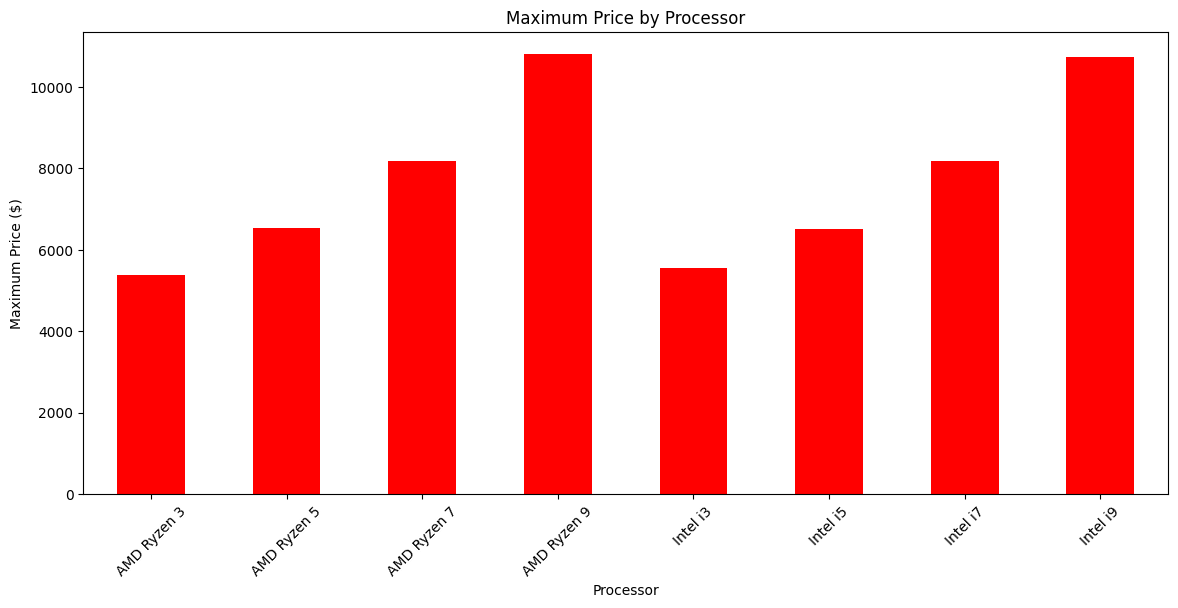

In [53]:
plt.figure(figsize=(14, 6))
df.groupby('Processor')['Price ($)'].max().plot(kind='bar', color='red')
plt.title('Maximum Price by Processor')
plt.xlabel('Processor')
plt.ylabel('Maximum Price ($)')
plt.xticks(rotation=45)
plt.show()

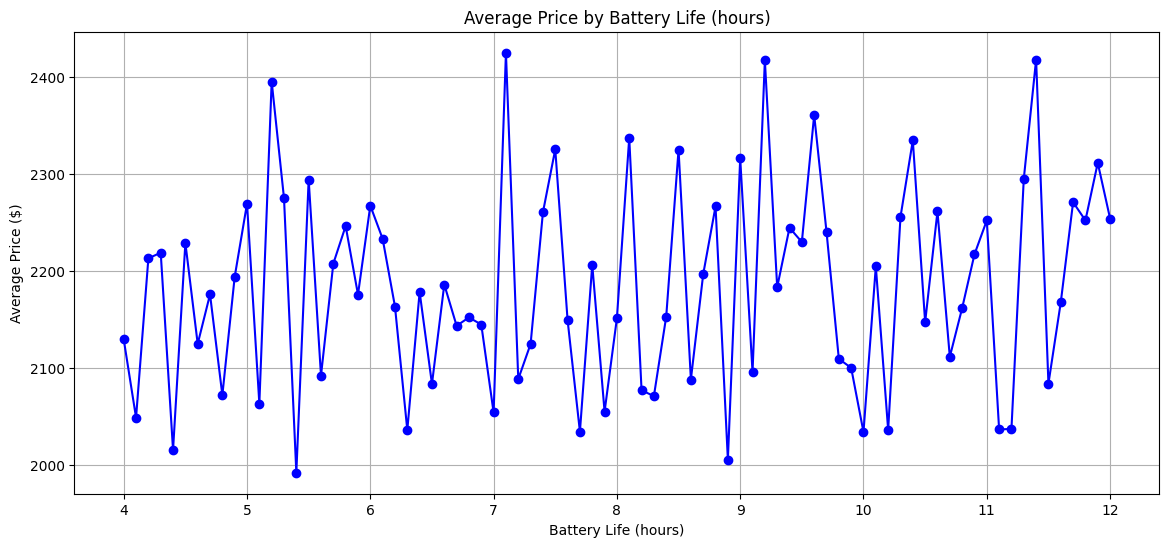

In [54]:
plt.figure(figsize=(14, 6))
df.groupby('Battery Life (hours)')['Price ($)'].mean().plot(kind='line', color='blue', marker='o')
plt.title('Average Price by Battery Life (hours)')
plt.xlabel('Battery Life (hours)')
plt.ylabel('Average Price ($)')
plt.grid(True)
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_18404\4288413032.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Operating System', data=df, palette='viridis')


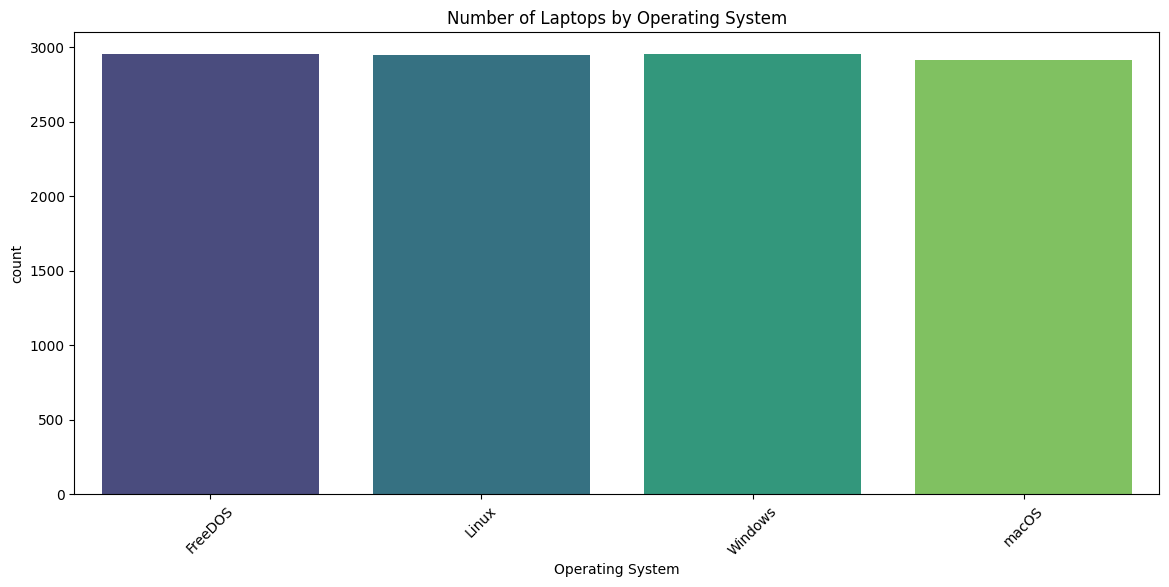

In [55]:
plt.figure(figsize=(14, 6))
sns.countplot(x='Operating System', data=df, palette='viridis')
plt.title('Number of Laptops by Operating System')
plt.xticks(rotation=45)
plt.show()

In [56]:
categorical_features = ['Brand', 'Processor', 'Storage', 'GPU', 'Resolution', 'Operating System']
numerical_features = ['RAM (GB)', 'Screen Size (inch)', 'Battery Life (hours)', 'Weight (kg)']

encoder = OneHotEncoder(sparse=False, drop='first')
categorical_Encoder = encoder.fit_transform(df[categorical_features])

scaler = StandardScaler()
numerical_scaled = scaler.fit_transform(df[numerical_features])


x = np.hstack((numerical_scaled, categorical_Encoder))
y = df['Price ($)'].values

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [58]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [59]:
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 213594.64
R-squared: 0.88


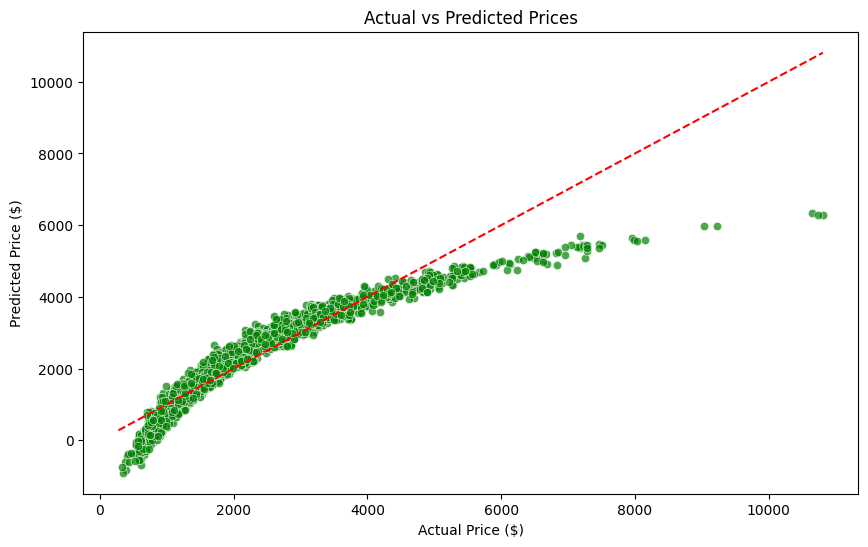

In [60]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title('Actual vs Predicted Prices')
plt.show()


In [61]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}



model = RandomForestRegressor()
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, scoring='r2')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='r2')

In [62]:
print("En iyi parametreler:", grid_search.best_params_)
print("En iyi skor (R²):", grid_search.best_score_)

En iyi parametreler: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
En iyi skor (R²): 0.9544974047318566


In [63]:
results_df = pd.DataFrame(grid_search.cv_results_)
results_df = results_df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]
results_df = results_df.sort_values(by='rank_test_score')
print(results_df.head())

                                               params  mean_test_score  \
9   {'max_depth': 20, 'min_samples_split': 2, 'n_e...         0.954497   
11  {'max_depth': 20, 'min_samples_split': 5, 'n_e...         0.954476   
0   {'max_depth': None, 'min_samples_split': 2, 'n...         0.954434   
3   {'max_depth': None, 'min_samples_split': 5, 'n...         0.954362   
8   {'max_depth': 20, 'min_samples_split': 2, 'n_e...         0.954296   

    std_test_score  rank_test_score  
9         0.005383                1  
11        0.005163                2  
0         0.005672                3  
3         0.005490                4  
8         0.005902                5  


In [64]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print("Test R²:", r2)

Test R²: 0.9642109804154015


In [65]:

cv_scores = grid_search.cv_results_['mean_test_score']
print("Cross-Validation Skorları:", cv_scores)

Cross-Validation Skorları: [0.95443428 0.9542433  0.95402864 0.95436206 0.93307168 0.93405547
 0.93373275 0.93385918 0.95429556 0.9544974  0.95382335 0.95447625]


In [66]:
# Düşük fiyatlı laptoplar (<1500$) için R²
low_price_mask = (y_test < 1500)
r2_low = r2_score(y_test[low_price_mask], y_pred[low_price_mask])

# Yüksek fiyatlı laptoplar (>3500$) için R²
high_price_mask = (y_test > 3500)
r2_high = r2_score(y_test[high_price_mask], y_pred[high_price_mask])

print("Düşük Fiyatlılar R²:", r2_low)
print("Yüksek Fiyatlılar R²:", r2_high)

Düşük Fiyatlılar R²: 0.6823411571600732
Yüksek Fiyatlılar R²: 0.8673542551634202


In [67]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Test MSE:", mse)
print("Test RMSE:", rmse)

Test MSE: 63420.92638109222
Test RMSE: 251.8351174500733


In [68]:

from sklearn.model_selection import cross_val_predict, KFold
import numpy as np

cv = KFold(n_splits=5, shuffle=True, random_state=42)  
for fold, (train_idx, test_idx) in enumerate(cv.split(x_train)):
    if fold == 4:  
        low_price_count = np.sum(y_train[test_idx] < 1500)
        high_price_count = np.sum(y_train[test_idx] > 3500)
        print(f"5. Fold - Düşük Fiyatlılar: {low_price_count}, Yüksek Fiyatlılar: {high_price_count}")

5. Fold - Düşük Fiyatlılar: 674, Yüksek Fiyatlılar: 269


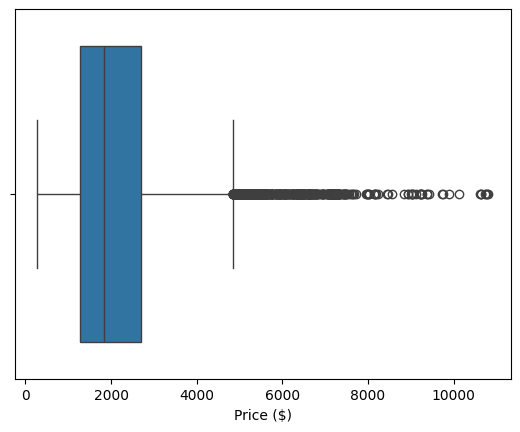

In [69]:
sns.boxplot(x=df['Price ($)'])
plt.show()

In [ ]:



categorical_cols = ['Brand', 'Operating System', 'GPU', 'Processor', 'Storage', 'Resolution']

# One-Hot Encoding 
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


X = df_encoded.drop('Price ($)', axis=1)
y = df_encoded['Price ($)']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [71]:
model_xgb = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.1,
    random_state=42
)


model_xgb.fit(X_train, y_train)


y_pred_xgb = model_xgb.predict(X_test)


r2_xgb = r2_score(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print("XGBoost Test R²:", r2_xgb)
print("XGBoost Test RMSE:", rmse_xgb)


XGBoost Test R²: 0.9893747474199146
XGBoost Test RMSE: 137.21797989405954


In [72]:
model_lgb = lgb.LGBMRegressor(
    objective='regression',
    num_leaves=31,
    learning_rate=0.05,
    n_estimators=200,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)


model_lgb.fit(X_train, y_train)


y_pred_lgb = model_lgb.predict(X_test)


r2_lgb = r2_score(y_test, y_pred_lgb)
rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))
print("LightGBM Test R²:", r2_lgb)
print("LightGBM Test RMSE:", rmse_lgb)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000061 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 390
[LightGBM] [Info] Number of data points in the train set: 9414, number of used features: 36
[LightGBM] [Info] Start training from score 2176.877232
LightGBM Test R²: 0.9880622061894082
LightGBM Test RMSE: 145.446550857648


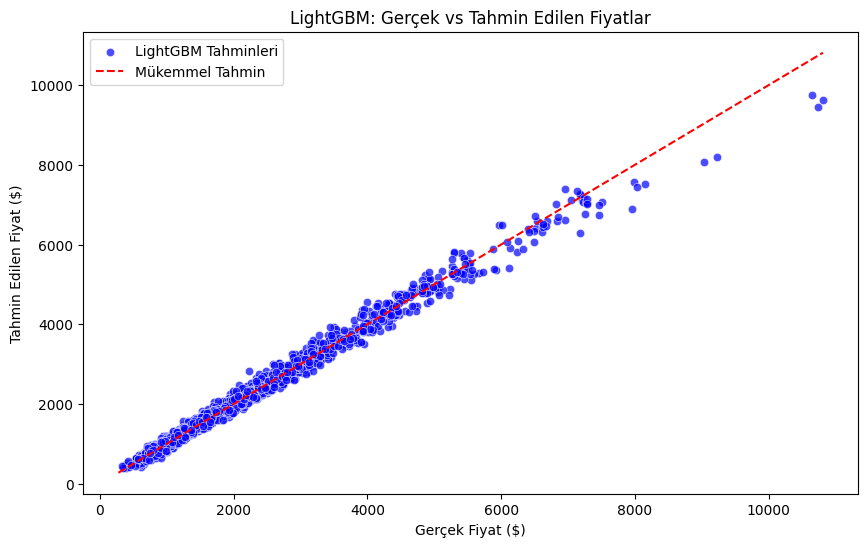

In [73]:

y_pred_lgb = model_lgb.predict(X_test)


plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_lgb, alpha=0.7, color='blue', label='LightGBM Tahminleri')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Mükemmel Tahmin')
plt.xlabel('Gerçek Fiyat ($)')
plt.ylabel('Tahmin Edilen Fiyat ($)')
plt.title('LightGBM: Gerçek vs Tahmin Edilen Fiyatlar')
plt.legend()
plt.show()

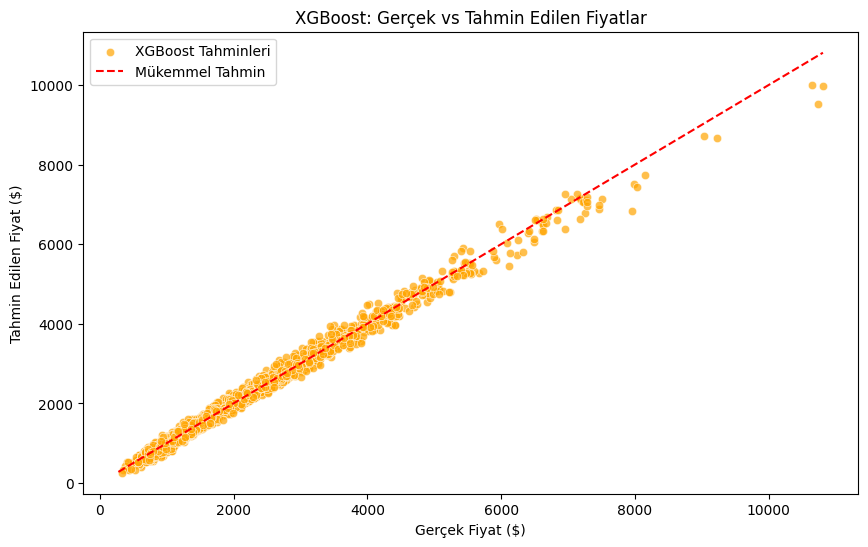

In [74]:

y_pred_xgb = model_xgb.predict(X_test)


plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_xgb, alpha=0.7, color='orange', label='XGBoost Tahminleri')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Mükemmel Tahmin')
plt.xlabel('Gerçek Fiyat ($)')
plt.ylabel('Tahmin Edilen Fiyat ($)')
plt.title('XGBoost: Gerçek vs Tahmin Edilen Fiyatlar')
plt.legend()
plt.show()

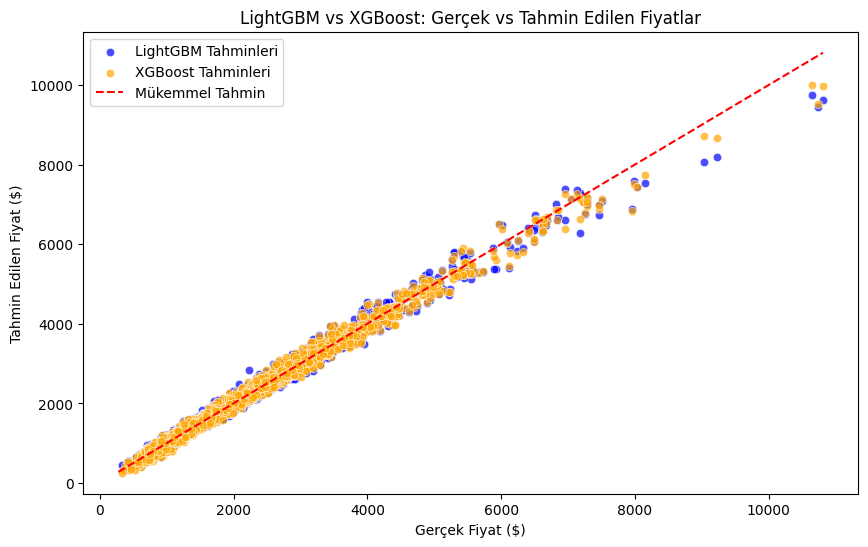

In [75]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_lgb, alpha=0.7, color='blue', label='LightGBM Tahminleri')
sns.scatterplot(x=y_test, y=y_pred_xgb, alpha=0.7, color='orange', label='XGBoost Tahminleri')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Mükemmel Tahmin')
plt.xlabel('Gerçek Fiyat ($)')
plt.ylabel('Tahmin Edilen Fiyat ($)')
plt.title('LightGBM vs XGBoost: Gerçek vs Tahmin Edilen Fiyatlar')
plt.legend()
plt.show()

In [76]:

y_train_pred_lgb = model_lgb.predict(X_train)
train_r2_lgb = r2_score(y_train, y_train_pred_lgb)
train_rmse_lgb = np.sqrt(mean_squared_error(y_train, y_train_pred_lgb))

y_test_pred_lgb = model_lgb.predict(X_test)
test_r2_lgb = r2_score(y_test, y_test_pred_lgb)
test_rmse_lgb = np.sqrt(mean_squared_error(y_test, y_test_pred_lgb))

print("LightGBM Eğitim R²:", train_r2_lgb)
print("LightGBM Test R²:", test_r2_lgb)
print("LightGBM Eğitim RMSE:", train_rmse_lgb)
print("LightGBM Test RMSE:", test_rmse_lgb)

LightGBM Eğitim R²: 0.9915349171116384
LightGBM Test R²: 0.9880622061894082
LightGBM Eğitim RMSE: 120.81555653392269
LightGBM Test RMSE: 145.446550857648


In [77]:
from sklearn.model_selection import cross_val_score


cv_scores_lgb = cross_val_score(model_lgb, X_train, y_train, cv=5, scoring='r2')
print("LightGBM Çapraz Doğrulama R² Skorları:", cv_scores_lgb)
print("LightGBM Ortalama Çapraz Doğrulama R²:", cv_scores_lgb.mean())

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000052 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 390
[LightGBM] [Info] Number of data points in the train set: 7531, number of used features: 36
[LightGBM] [Info] Start training from score 2174.426044
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000055 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 390
[LightGBM] [Info] Number of data points in the train set: 7531, number of used features: 36
[LightGBM] [Info] Start training from score 2178.496752
[LightGBM] [Warning] Found